<a href="https://colab.research.google.com/github/celiahc823/ANN-vs-CNN/blob/main/TransferLearning2.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
!wget --no-check-certificate \
    https://storage.googleapis.com/mledu-datasets/cats_and_dogs_filtered.zip \
    -O /tmp/cats_and_dogs_filtered.zip

--2022-03-24 15:56:04--  https://storage.googleapis.com/mledu-datasets/cats_and_dogs_filtered.zip
Resolving storage.googleapis.com (storage.googleapis.com)... 74.125.129.128, 173.194.197.128, 108.177.112.128, ...
Connecting to storage.googleapis.com (storage.googleapis.com)|74.125.129.128|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 68606236 (65M) [application/zip]
Saving to: ‘/tmp/cats_and_dogs_filtered.zip’

/tmp/cats_and_dogs_ 100%[===================>]  65.43M   243MB/s    in 0.3s    

2022-03-24 15:56:04 (243 MB/s) - ‘/tmp/cats_and_dogs_filtered.zip’ saved [68606236/68606236]



In [ ]:
import os
import zipfile
import tensorflow as tf
from tensorflow.keras.preprocessing.image import ImageDataGenerator

In [ ]:
local_zip = '/tmp/cats_and_dogs_filtered.zip'
zip_ref = zipfile.ZipFile(local_zip, 'r')
zip_ref.extractall('/tmp')
zip_ref.close()

In [ ]:
base_dir = '/tmp/cats_and_dogs_filtered'
train_dir = os.path.join(base_dir, 'train')
validation_dir = os.path.join(base_dir, 'validation')

In [ ]:
train_cats_dir = os.path.join(train_dir, 'cats')
train_dogs_dir = os.path.join(train_dir, 'dogs')

validation_cats_dir = os.path.join(validation_dir, 'cats')
validation_dogs_dir = os.path.join(validation_dir, 'dogs')


In [ ]:
os.listdir(train_cats_dir)[:10]

['cat.244.jpg',
 'cat.844.jpg',
 'cat.961.jpg',
 'cat.75.jpg',
 'cat.937.jpg',
 'cat.184.jpg',
 'cat.891.jpg',
 'cat.597.jpg',
 'cat.567.jpg',
 'cat.769.jpg']

In [ ]:
print('Number of cat images for training   : ', len(os.listdir(train_cats_dir)))
print('Number of dog images for training   : ', len(os.listdir(train_dogs_dir)))
print('Number of cat images for validation : ', len(os.listdir(validation_cats_dir)))
print('Number of dog images for validation : ', len(os.listdir(validation_dogs_dir)))

Number of cat images for training   :  1000
Number of dog images for training   :  1000
Number of cat images for validation :  500
Number of dog images for validation :  500


In [ ]:
train_cat_images = os.listdir(train_cats_dir)[:36]
print(train_cat_images)

print()
train_dog_images = os.listdir(train_dogs_dir)[:36]
print(train_dog_images)

['cat.244.jpg', 'cat.844.jpg', 'cat.961.jpg', 'cat.75.jpg', 'cat.937.jpg', 'cat.184.jpg', 'cat.891.jpg', 'cat.597.jpg', 'cat.567.jpg', 'cat.769.jpg', 'cat.603.jpg', 'cat.760.jpg', 'cat.42.jpg', 'cat.175.jpg', 'cat.753.jpg', 'cat.729.jpg', 'cat.96.jpg', 'cat.180.jpg', 'cat.391.jpg', 'cat.373.jpg', 'cat.371.jpg', 'cat.944.jpg', 'cat.900.jpg', 'cat.447.jpg', 'cat.619.jpg', 'cat.707.jpg', 'cat.262.jpg', 'cat.662.jpg', 'cat.481.jpg', 'cat.378.jpg', 'cat.128.jpg', 'cat.671.jpg', 'cat.490.jpg', 'cat.208.jpg', 'cat.928.jpg', 'cat.568.jpg']

['dog.824.jpg', 'dog.109.jpg', 'dog.458.jpg', 'dog.183.jpg', 'dog.829.jpg', 'dog.803.jpg', 'dog.800.jpg', 'dog.610.jpg', 'dog.648.jpg', 'dog.903.jpg', 'dog.563.jpg', 'dog.753.jpg', 'dog.607.jpg', 'dog.418.jpg', 'dog.641.jpg', 'dog.278.jpg', 'dog.33.jpg', 'dog.637.jpg', 'dog.568.jpg', 'dog.4.jpg', 'dog.660.jpg', 'dog.92.jpg', 'dog.300.jpg', 'dog.739.jpg', 'dog.853.jpg', 'dog.843.jpg', 'dog.814.jpg', 'dog.710.jpg', 'dog.993.jpg', 'dog.900.jpg', 'dog.880.jpg',

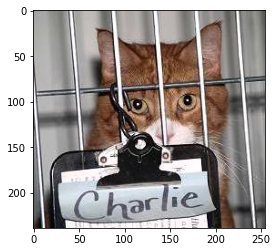

In [ ]:
import matplotlib.pyplot as plt
import matplotlib.image as mpimg

cat_image_path = os.path.join(train_cats_dir, 'cat.587.jpg')

cat_image = mpimg.imread(cat_image_path)
plt.imshow(cat_image)

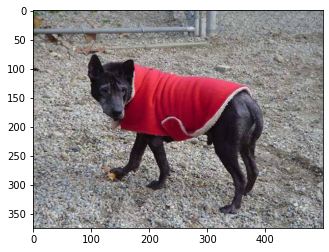

In [ ]:
dog_image_path = os.path.join(train_dogs_dir, 'dog.902.jpg')

dog_image = mpimg.imread(dog_image_path)
plt.imshow(dog_image)

In [ ]:
cat_image_paths = [os.path.join(train_cats_dir, fname) for fname in train_cat_images]
cat_image_paths                               # paths of 36 training cat images

['/tmp/cats_and_dogs_filtered/train/cats/cat.244.jpg',
 '/tmp/cats_and_dogs_filtered/train/cats/cat.844.jpg',
 '/tmp/cats_and_dogs_filtered/train/cats/cat.961.jpg',
 '/tmp/cats_and_dogs_filtered/train/cats/cat.75.jpg',
 '/tmp/cats_and_dogs_filtered/train/cats/cat.937.jpg',
 '/tmp/cats_and_dogs_filtered/train/cats/cat.184.jpg',
 '/tmp/cats_and_dogs_filtered/train/cats/cat.891.jpg',
 '/tmp/cats_and_dogs_filtered/train/cats/cat.597.jpg',
 '/tmp/cats_and_dogs_filtered/train/cats/cat.567.jpg',
 '/tmp/cats_and_dogs_filtered/train/cats/cat.769.jpg',
 '/tmp/cats_and_dogs_filtered/train/cats/cat.603.jpg',
 '/tmp/cats_and_dogs_filtered/train/cats/cat.760.jpg',
 '/tmp/cats_and_dogs_filtered/train/cats/cat.42.jpg',
 '/tmp/cats_and_dogs_filtered/train/cats/cat.175.jpg',
 '/tmp/cats_and_dogs_filtered/train/cats/cat.753.jpg',
 '/tmp/cats_and_dogs_filtered/train/cats/cat.729.jpg',
 '/tmp/cats_and_dogs_filtered/train/cats/cat.96.jpg',
 '/tmp/cats_and_dogs_filtered/train/cats/cat.180.jpg',
 '/tmp/cats_a

In [ ]:
dog_image_paths = [os.path.join(train_dogs_dir, fname) for fname in train_dog_images]
dog_image_paths                            # paths of 36 training dog images

['/tmp/cats_and_dogs_filtered/train/dogs/dog.824.jpg',
 '/tmp/cats_and_dogs_filtered/train/dogs/dog.109.jpg',
 '/tmp/cats_and_dogs_filtered/train/dogs/dog.458.jpg',
 '/tmp/cats_and_dogs_filtered/train/dogs/dog.183.jpg',
 '/tmp/cats_and_dogs_filtered/train/dogs/dog.829.jpg',
 '/tmp/cats_and_dogs_filtered/train/dogs/dog.803.jpg',
 '/tmp/cats_and_dogs_filtered/train/dogs/dog.800.jpg',
 '/tmp/cats_and_dogs_filtered/train/dogs/dog.610.jpg',
 '/tmp/cats_and_dogs_filtered/train/dogs/dog.648.jpg',
 '/tmp/cats_and_dogs_filtered/train/dogs/dog.903.jpg',
 '/tmp/cats_and_dogs_filtered/train/dogs/dog.563.jpg',
 '/tmp/cats_and_dogs_filtered/train/dogs/dog.753.jpg',
 '/tmp/cats_and_dogs_filtered/train/dogs/dog.607.jpg',
 '/tmp/cats_and_dogs_filtered/train/dogs/dog.418.jpg',
 '/tmp/cats_and_dogs_filtered/train/dogs/dog.641.jpg',
 '/tmp/cats_and_dogs_filtered/train/dogs/dog.278.jpg',
 '/tmp/cats_and_dogs_filtered/train/dogs/dog.33.jpg',
 '/tmp/cats_and_dogs_filtered/train/dogs/dog.637.jpg',
 '/tmp/cats

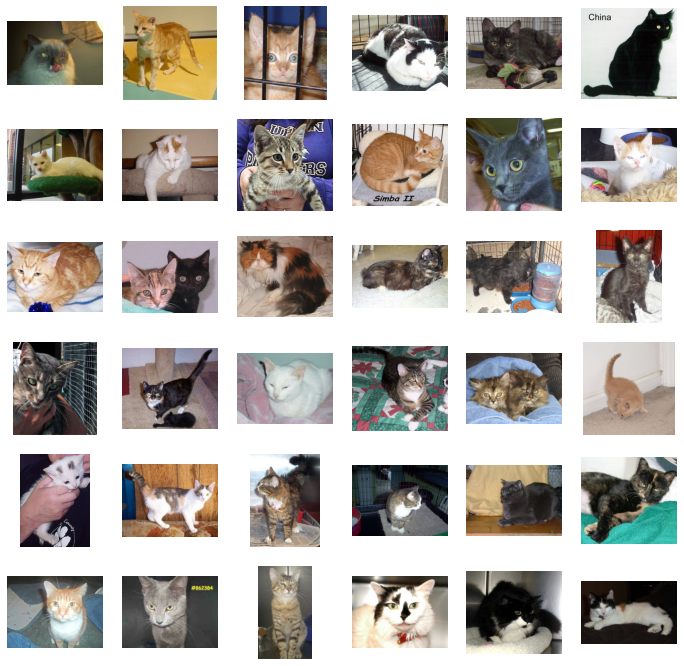

In [ ]:
plt.figure(figsize = (12,12))
i = 1
for path in cat_image_paths:
  plt.subplot(6,6,i)
  plt.axis('off')
  cat_image = mpimg.imread(path)
  plt.imshow(cat_image)
  i += 1

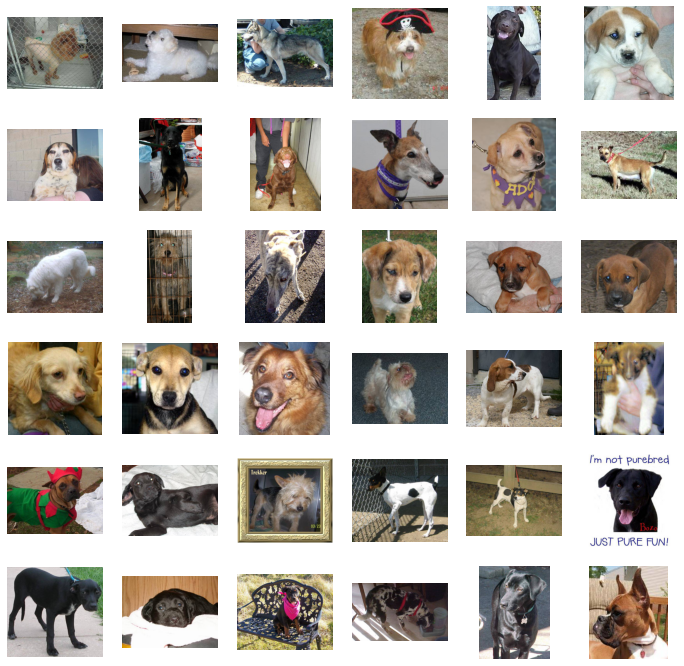

In [ ]:
plt.figure(figsize = (12,12))
i = 1
for path in dog_image_paths:
  plt.subplot(6,6,i)
  plt.axis('off')
  dog_image = mpimg.imread(path)
  plt.imshow(dog_image)
  i += 1

In [ ]:
train_datagen = ImageDataGenerator(
    rescale = 1 / 255,
    rotation_range = 10,
    zoom_range = 0.1,
    width_shift_range = 0.1,
    height_shift_range = 0.1,
    horizontal_flip = True
)

In [ ]:
train_generator = train_datagen.flow_from_directory(
        train_dir,
        target_size = (250,250),
        batch_size = 32,
        class_mode = 'binary'
)

Found 2000 images belonging to 2 classes.


In [ ]:
val_datagen = ImageDataGenerator(rescale = 1 / 255)
val_generator = val_datagen.flow_from_directory(
        validation_dir,
        target_size = (250,250),
        batch_size = 32,
        class_mode = 'binary'
)

Found 1000 images belonging to 2 classes.


In [ ]:
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Dense, Flatten

model = tf.keras.models.Sequential()
model.add(Conv2D(64, (3,3), activation = 'relu', input_shape = (250,250,3)))
model.add(MaxPooling2D(2,2))
model.add(Conv2D(128, (3,3), activation = 'relu'))
model.add(MaxPooling2D(2,2))
model.add(Conv2D(256, (3,3), activation = 'relu'))
model.add(MaxPooling2D(2,2))
model.add(Conv2D(256, (3,3), activation = 'relu'))
model.add(MaxPooling2D(2,2))
model.add(Conv2D(512, (3,3), activation = 'relu'))
model.add(MaxPooling2D(2,2))
model.add(Conv2D(512, (3,3), activation = 'relu'))
model.add(MaxPooling2D(2,2))
model.add(Flatten())
model.add(Dense(512, activation = 'relu'))
model.add(Dense(1, activation = 'sigmoid'))

model.summary()

Model: "sequential_4"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_24 (Conv2D)          (None, 248, 248, 64)      1792      
                                                                 
 max_pooling2d_24 (MaxPoolin  (None, 124, 124, 64)     0         
 g2D)                                                            
                                                                 
 conv2d_25 (Conv2D)          (None, 122, 122, 128)     73856     
                                                                 
 max_pooling2d_25 (MaxPoolin  (None, 61, 61, 128)      0         
 g2D)                                                            
                                                                 
 conv2d_26 (Conv2D)          (None, 59, 59, 256)       295168    
                                                                 
 max_pooling2d_26 (MaxPoolin  (None, 29, 29, 256)     

In [ ]:
from tensorflow.keras.optimizers import SGD 
model.compile(loss = 'binary_crossentropy',
              optimizer =SGD(),
              metrics = ['accuracy']              )

In [ ]:
history1 = model.fit(
    train_generator,
    validation_data = val_generator,
    epochs = 40,
    verbose = 1
)

Epoch 1/40
63/63 [==============================] - 48s 749ms/step - loss: 0.6932 - accuracy: 0.4880 - val_loss: 0.6927 - val_accuracy: 0.5010
Epoch 2/40
63/63 [==============================] - 46s 728ms/step - loss: 0.6928 - accuracy: 0.5060 - val_loss: 0.6922 - val_accuracy: 0.5030
Epoch 3/40
63/63 [==============================] - 46s 722ms/step - loss: 0.6925 - accuracy: 0.5100 - val_loss: 0.6918 - val_accuracy: 0.5100
Epoch 4/40
63/63 [==============================] - 47s 746ms/step - loss: 0.6923 - accuracy: 0.5290 - val_loss: 0.6914 - val_accuracy: 0.5280
Epoch 5/40
63/63 [==============================] - 47s 739ms/step - loss: 0.6917 - accuracy: 0.5540 - val_loss: 0.6909 - val_accuracy: 0.5110
Epoch 6/40
63/63 [==============================] - 46s 732ms/step - loss: 0.6915 - accuracy: 0.5320 - val_loss: 0.6905 - val_accuracy: 0.5500
Epoch 7/40
63/63 [==============================] - 47s 741ms/step - loss: 0.6910 - accuracy: 0.5785 - val_loss: 0.6902 - val_accuracy: 0.5080

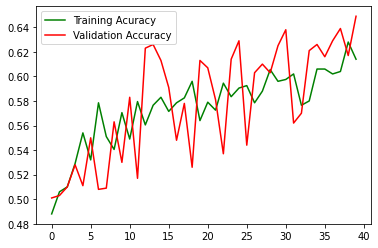

In [ ]:
acc = history1.history['accuracy']
val_acc = history1.history['val_accuracy']
loss = history1.history['loss']
val_loss = history1.history['val_loss']

plt.figure()
plt.plot(acc,color = 'green',label = 'Training Acuracy')
plt.plot(val_acc,color = 'red',label = 'Validation Accuracy')
plt.legend()

______________________________________________________
# Transfer Learning

In [ ]:
!wget --no-check-certificate \
    https://storage.googleapis.com/mledu-datasets/inception_v3_weights_tf_dim_ordering_tf_kernels_notop.h5 \
    -O /tmp/inception_v3_weights_tf_dim_ordering_tf_kernels_notop.h5

--2022-03-24 16:51:36--  https://storage.googleapis.com/mledu-datasets/inception_v3_weights_tf_dim_ordering_tf_kernels_notop.h5
Resolving storage.googleapis.com (storage.googleapis.com)... 74.125.201.128, 74.125.202.128, 74.125.69.128, ...
Connecting to storage.googleapis.com (storage.googleapis.com)|74.125.201.128|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 87910968 (84M) [application/x-hdf]
Saving to: ‘/tmp/inception_v3_weights_tf_dim_ordering_tf_kernels_notop.h5’

/tmp/inception_v3_w 100%[===================>]  83.84M   240MB/s    in 0.3s    

2022-03-24 16:51:36 (240 MB/s) - ‘/tmp/inception_v3_weights_tf_dim_ordering_tf_kernels_notop.h5’ saved [87910968/87910968]



In [ ]:
local_weights_file = '/tmp/inception_v3_weights_tf_dim_ordering_tf_kernels_notop.h5'

In [ ]:
from tensorflow.keras.applications.inception_v3 import InceptionV3

pre_trained_model = InceptionV3(input_shape = (250,250,3),
                                include_top = False,
                                weights = None)

In [ ]:
pre_trained_model.load_weights(local_weights_file)

for layer in pre_trained_model.layers:
  layer.trainable = False

pre_trained_model.summary()

Model: "inception_v3"
__________________________________________________________________________________________________
 Layer (type)                   Output Shape         Param #     Connected to                     
 input_1 (InputLayer)           [(None, 250, 250, 3  0           []                               
                                )]                                                                
                                                                                                  
 conv2d_30 (Conv2D)             (None, 124, 124, 32  864         ['input_1[0][0]']                
                                )                                                                 
                                                                                                  
 batch_normalization (BatchNorm  (None, 124, 124, 32  96         ['conv2d_30[0][0]']              
 alization)                     )                                                      

In [ ]:
last_layer = pre_trained_model.get_layer('mixed7')
print(last_layer.output_shape)
last_output = last_layer.output

(None, 13, 13, 768)


In [ ]:
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Dense, Flatten,Dropout
from tensorflow.keras import Model
from tensorflow.keras.optimizers import RMSprop

x = Flatten()(last_output)
x = Dense(1024, activation = 'relu')(x)
x = Dropout(0.2)(x)
x = Dense(1, activation = 'sigmoid')(x)

model2 = Model(pre_trained_model.input, x)

model2.compile(optimizer = RMSprop(lr = 0.0001),
               loss = 'binary_crossentropy',
               metrics = ['accuracy'])

model2.summary()

Model: "model"
__________________________________________________________________________________________________
 Layer (type)                   Output Shape         Param #     Connected to                     
 input_1 (InputLayer)           [(None, 250, 250, 3  0           []                               
                                )]                                                                
                                                                                                  
 conv2d_30 (Conv2D)             (None, 124, 124, 32  864         ['input_1[0][0]']                
                                )                                                                 
                                                                                                  
 batch_normalization (BatchNorm  (None, 124, 124, 32  96         ['conv2d_30[0][0]']              
 alization)                     )                                                             

/usr/local/lib/python3.7/dist-packages/keras/optimizer_v2/rmsprop.py:130: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super(RMSprop, self).__init__(name, **kwargs)


 ing2D)                                                                                           
                                                                                                  
 conv2d_35 (Conv2D)             (None, 28, 28, 64)   12288       ['max_pooling2d_31[0][0]']       
                                                                                                  
 conv2d_37 (Conv2D)             (None, 28, 28, 64)   76800       ['activation_6[0][0]']           
                                                                                                  
 conv2d_40 (Conv2D)             (None, 28, 28, 96)   82944       ['activation_9[0][0]']           
                                                                                                  
 conv2d_41 (Conv2D)             (None, 28, 28, 32)   6144        ['average_pooling2d[0][0]']      
                                                                                                  
 batch_nor

In [ ]:
history2 = model2.fit(
    train_generator,
    validation_data = val_generator,
    epochs = 20,
    verbose = 1
)

Epoch 1/20
63/63 [==============================] - 48s 758ms/step - loss: 0.0713 - accuracy: 0.9725 - val_loss: 0.0472 - val_accuracy: 0.9800
Epoch 2/20
63/63 [==============================] - 46s 735ms/step - loss: 0.0703 - accuracy: 0.9765 - val_loss: 0.0250 - val_accuracy: 0.9920
Epoch 3/20
63/63 [==============================] - 46s 732ms/step - loss: 0.0181 - accuracy: 0.9935 - val_loss: 0.0806 - val_accuracy: 0.9760
Epoch 4/20
63/63 [==============================] - 47s 741ms/step - loss: 0.0301 - accuracy: 0.9930 - val_loss: 0.1848 - val_accuracy: 0.9620
Epoch 5/20
63/63 [==============================] - 47s 738ms/step - loss: 0.0482 - accuracy: 0.9885 - val_loss: 0.0573 - val_accuracy: 0.9810
Epoch 6/20
63/63 [==============================] - 47s 739ms/step - loss: 0.0182 - accuracy: 0.9935 - val_loss: 0.0524 - val_accuracy: 0.9890
Epoch 7/20
63/63 [==============================] - 46s 730ms/step - loss: 0.0115 - accuracy: 0.9960 - val_loss: 0.0656 - val_accuracy: 0.9800

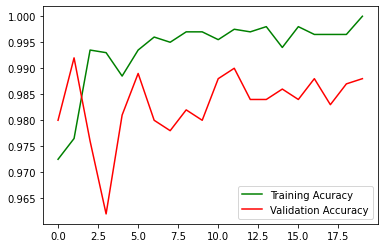

In [ ]:
acc2 = history2.history['accuracy']
val_acc2 = history2.history['val_accuracy']
loss2 = history2.history['loss']
val_loss2 = history2.history['val_loss']

plt.figure()
plt.plot(acc,color = 'green',label = 'Training Acuracy')
plt.plot(val_acc,color = 'red',label = 'Validation Accuracy')
plt.legend()

In [ ]:
acc1 = history1.history['accuracy']
val_acc1 = history1.history['val_accuracy']
loss1 = history1.history['loss']
val_loss1 = history1.history['val_loss']

acc2 = history2.history['accuracy']
val_acc2 = history2.history['val_accuracy']
loss2 = history2.history['loss']
val_loss2 = history2.history['val_loss']


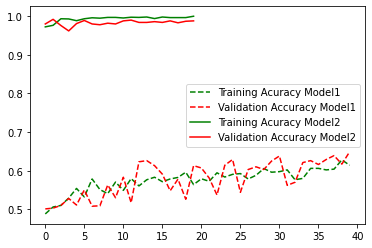

In [ ]:
plt.figure()
plt.plot(acc1,'g--',label = 'Training Acuracy Model1')
plt.plot(val_acc1,'r--',label = 'Validation Accuracy Model1')
plt.plot(acc2,'g-',label = 'Training Acuracy Model2')
plt.plot(val_acc2,'r-',label = 'Validation Accuracy Model2')
plt.legend()

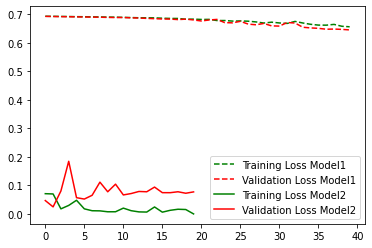

In [ ]:
plt.figure()
plt.plot(loss1,'g--',label = 'Training Loss Model1')
plt.plot(val_loss1,'r--',label = 'Validation Loss Model1')
plt.plot(loss2,'g-',label = 'Training Loss Model2')
plt.plot(val_loss2,'r-',label = 'Validation Loss Model2')
plt.legend()